### ***1***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##BATCH GRADIENT DESCENT

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path= "/content/drive/MyDrive/ML/data_q1.xlsx"
dataframe = pd.read_excel(path)
instances= dataframe.to_numpy()
m= len(instances[:,0])
ones= np.ones((m,1))
instances = np.append(ones,instances,axis=1)
n = len(instances[0,:])
instances_copy = instances.copy()
#Normalization
y_mean = instances[:,n-1].mean()
y_std = instances[:,n-1].std()
for i in range (1,n,1):
  instances[:,i] = (instances[:,i]-instances[:,i].mean())/instances[:,i].std()
iter = 5000
alpha = 0.0001
w = np.random.rand(3)
w_list = np.ones((iter,3))
j_list = np.ones(iter)  #cost function

In [ ]:
def update(w,alpha,h,instances,m,n):
  d= [0,0,0]
# for w0
  for i in range(m):
    d[0] = d[0] + (h[i]-instances[i,n-1])
#for w1 
  for i in range(m):
    d[1] = d[1] + (h[i]-instances[i,n-1])*instances[i,1]
#for w2
  for i in range(m):
    d[2] = d[2] + (h[i]-instances[i,n-1])*instances[i,2]

  w[0] = w[0] - alpha*d[0]
  w[1] = w[1] - alpha*d[1]
  w[2] = w[2] - alpha*d[2]
  return w

def hypothesis(w,instances,m):
  h = np.ones(m)
  for i in range(m):
    h[i] = w[0]+w[1]*instances[i,1]+w[2]*instances[i,2]
  return h

def cost(m,instances,h,n):
  c = 0
  for i in range(m):
    c = c + 0.5*(h[i]-instances[i,n-1])**2
  return c

def denormalize(data,avg,vari):
  '''Denormalize a list using the passed in mean and variation'''
  data1 = []
  for i in range(0,len(data)):
    data1.append((data[i]*vari) + avg)
  return data1

[8.25017252e-16 3.47669081e-02 3.02737829e-01]
21.89800060066827


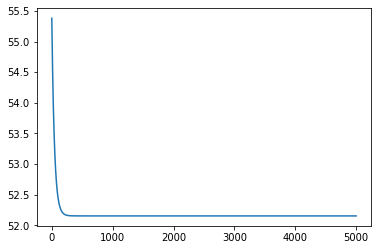

In [ ]:
#batch gradient descent
w_list[0] = w 
h = hypothesis(w,instances,m)
for i in range (iter):
  w = update(w,alpha,h,instances,m,n)
  w_list[i]= w
  h= hypothesis(w,instances,m)
  j_list[i]= cost(m,instances,h,n)


x= np.arange(iter)
print(w_list[iter-1])
h=hypothesis(w_list[iter-1],instances_copy,m)
c= cost(m,instances_copy,h,n)
print(c)
plt.plot(x,j_list)
plt.show()

w1=  0.03476690807104153
w2= 0.30273782854431697


Text(0.5, 0.92, 'Cost vs weights')

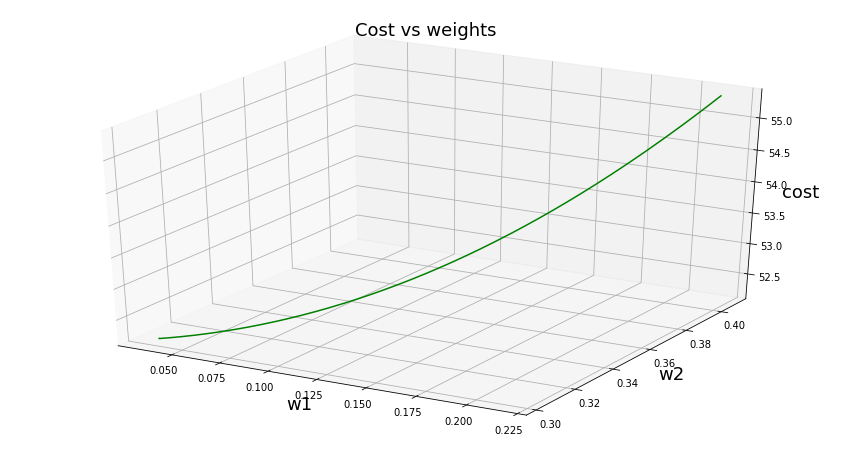

In [ ]:
print("w1= ",end=" ")
print(w_list[iter-1,1])
print("w2=" ,end=" ")
print( w_list[iter-1,2])
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D( w_list[:,1], w_list[:,2],j_list, 'green')
gr.set_xlabel("w1", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("cost", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

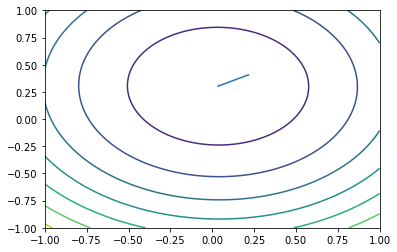

In [ ]:
def f(w0,w1,w2,instances,m):
  val=0
  for i in range(m):
    val= val+ (w0+w1*instances[i,1]+w2*instances[i,2]-instances[i,3])**2
  return val/(2*m)
w0 = w_list[iter-1,0]
w1 = np.linspace(-1,1,1000)
w2 = np.linspace(-1,1,1000)
x,y= np.meshgrid(w1,w2)
z= f(w0,x,y,instances,m)
plt.contour(x,y,z)
plt.plot(w_list[:,1],w_list[:,2])
plt.show()

#MINI BATCH GRADIENT DESCENT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
itr_mb = 4000
instances_mb = instances.copy()
w_list_mb = np.ones((itr_mb,3))
j_list_mb = np.ones(itr_mb)
w_mb = np.random.rand(3)
alpha_mb = 0.0001

In [ ]:
m_batch = 20 #batch size

for i in range(itr_mb):
  np.random.shuffle(instances_mb)
  h = hypothesis(w_mb,instances_mb,m)
  w_mb = update(w_mb,alpha_mb,h,instances_mb,m_batch,n)
  w_list_mb[i] = w_mb
  j_list_mb[i] = cost(m,instances_mb,h,n)

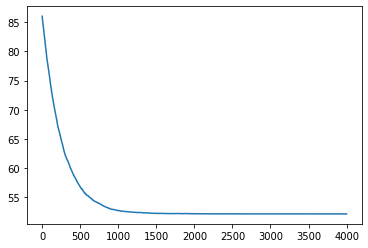

In [ ]:
x_mb = np.arange(itr_mb)
plt.plot(x_mb,j_list_mb)
plt.show()
#w_list_mb

Text(0.5, 0.92, 'Cost vs weights')

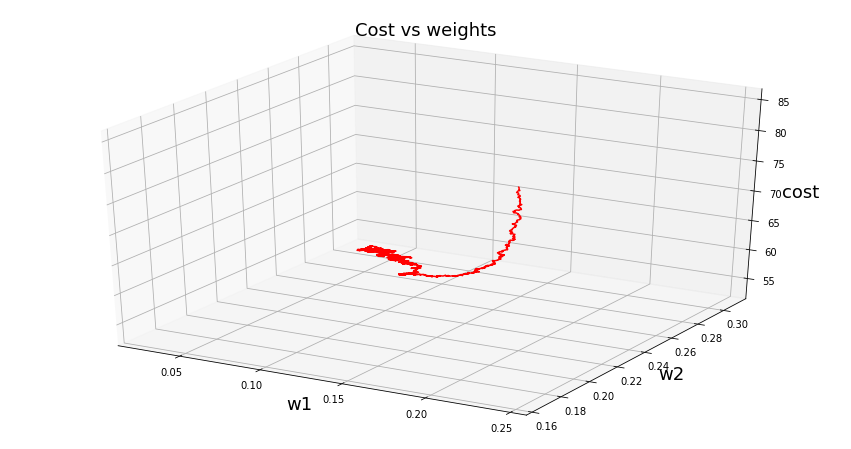

In [ ]:
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D( w_list_mb[:,1], w_list_mb[:,2],j_list_mb, 'red')
gr.set_xlabel("w1", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("cost", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

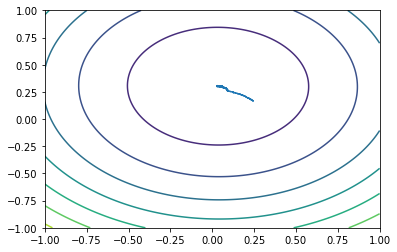

In [ ]:
w0 = 0
w1 = np.linspace(-1,1,1000)
w2 = np.linspace(-1,1,1000)
x,y= np.meshgrid(w1,w2)
z= f(w0,x,y,instances,m)
plt.contour(x,y,z)
plt.plot(w_list_mb[:,1],w_list_mb[:,2])
plt.show()

# STOCHASTIC GRADIENT DESCENT

In [ ]:
def update_s(w,h,instances,alpha,n,i):
  for p in range(3):
    w[p] = w[p] - alpha*((h[i]- instances[i,n-1])*instances[i,p] )
  return w
itr_s = 5000
instances_s = instances.copy()
w_list_s = np.ones((itr_s,3))
j_list_s = np.ones(itr_s)
w_s = np.random.rand(3)
alpha_s = 0.0005


for i in range(itr_s):
  index = np.random.randint(0,m-1)
  h= hypothesis(w_s,instances_s,m)
  w_s = update_s(w_s,h,instances_s,alpha_s,n,index)
  w_list_s[i] = w_s
  j_list_s[i] = cost(m,instances_s,h,n)

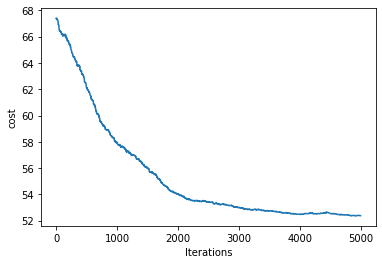

In [ ]:
x_s = np.arange(itr_s)
plt.plot(x_s,j_list_s)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.show()

Text(0.5, 0.92, 'Cost vs weights')

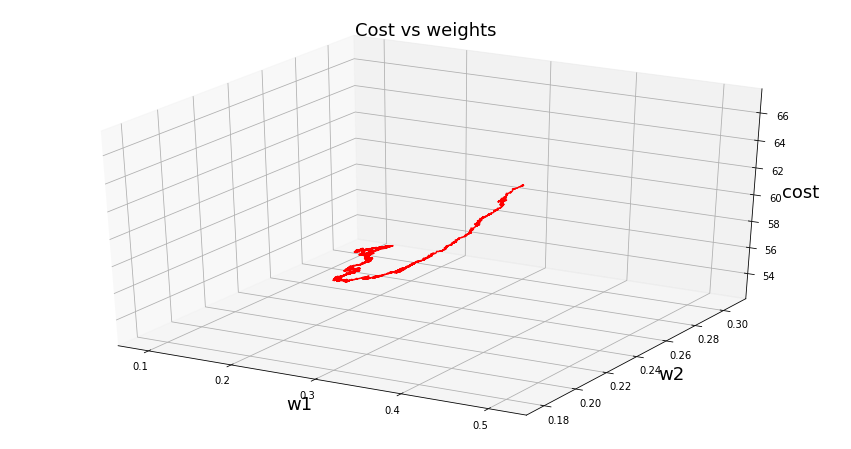

In [ ]:
plt.figure(figsize=(15,8))
gr = plt.axes(projection='3d')
gr.plot3D( w_list_s[:,1], w_list_s[:,2],j_list_s, 'red')
gr.set_xlabel("w1", fontsize = 18)
gr.set_ylabel("w2", fontsize = 18)
gr.set_zlabel("cost", fontsize = 18)
gr.set_title("Cost vs weights", fontsize = 18)

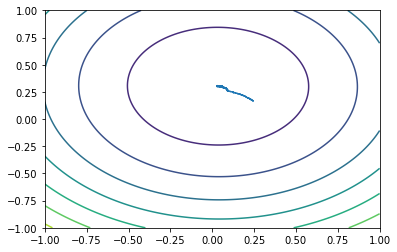

In [ ]:
w0 = 0
w1 = np.linspace(-1,1,1000)
w2 = np.linspace(-1,1,1000)
x,y= np.meshgrid(w1,w2)
z= f(w0,x,y,instances,m)
plt.contour(x,y,z)
plt.plot(w_list_mb[:,1],w_list_mb[:,2])
plt.show()